In [9]:
# Created by GB - 10/22
import numpy as np
import pandas as pd
import os
from PIL import Image
import random
import statistics
def numpy_arrays(path1,path2):
    delimiter = chr(92)
    path_list = []
    arrays_list1 = []
    arrays_list2 = []
    path_list.append(path1)
    path_list.append(path2)
    counter = 0
    for paths in range(len(path_list)):
        listdir = os.listdir(path_list[paths])
        counter += 1
        for items in listdir:
            items.split()
            if counter == 1:
                image = PIL.Image.open(path1+delimiter+items)
            else:
                image = PIL.Image.open(path2+delimiter+items)
            image_inf = image.getdata()
            sub_array = np.array(image_inf)
            if counter == 1:
                arrays_list1.append(sub_array)
            else:
                arrays_list2.append(sub_array)
    
    ones= np.ones((len(arrays_list1),), dtype=int)
    ones = ones.tolist()
    zeros= np.zeros((len(arrays_list2),), dtype=int)
    zeros = zeros.tolist()
    return arrays_list1,arrays_list2,ones,zeros

In [2]:
def conc_lists(array1,array2,ones,zeros):
    arrayX = array1
    arrayY = ones
    for i in range(len(array2)):
        arrayX.append(array2[i])
    for x in range(len(zeros)):
        arrayY.append(zeros[x])
        
    return arrayX, arrayY

In [3]:
def shuffle(X1,X2):
    X3 = list(zip(X1,X2))
    random.shuffle(X3)
    X1,X2 = zip(*X3)
    return X1,X2

In [4]:
def train_test_split(array1,array2,train_size):
        len_array1 = len(array1)
        len_array2 = len(array2)
        array1_train_size = int(train_size*len_array1)
        array2_train_size = int(train_size*len_array2)
        X_train = array1[:array1_train_size]
        Y_train = array2[:array1_train_size]
        X_test = array1[array2_train_size:]
        Y_test = array2[array2_train_size:]
        return X_train,Y_train,X_test,Y_test

In [5]:
def euclidean_distance(subarray1,subarray2):
    distance = 0
    distance_total = np.linalg.norm(subarray1-subarray2)
    return distance_total

In [6]:
def knn_classification(train_X,train_Y,test_X,test_Y,kernel_width):
    predicted = []
    #test points will be used to measure the distance with train data
    #train data in KNN is not the same with NN -> do not effect any weights or sth.
    for testXs in test_X:
        sub_distances = []
        for _ in range(len(train_X)):
    #every point in train data is used to measure distances with single test data
            sub_distances.append([euclidean_distance(train_X[_],testXs),train_Y[_]])
        sub_distance_inf = pd.DataFrame(data=sub_distances,columns=['dist','label'])
        knn_sub = sub_distance_inf.sort_values(by=['dist'],axis=0)[:kernel_width]
        labels = knn_sub['label']
        voting = statistics.mode(labels)
        predicted.append(voting)
    return predicted

In [7]:
def accuracy_s(y_true,y_pred):
    len_of_t = len(y_true)
    len_of_p = len(y_pred)
    true = 0
    if len_of_t != len_of_p:
        print("The sizes are not matched !")
    else:
        for _ in range(len_of_t):
            if y_true[_]==y_pred[_]:
                true += 1
                
                
    accuracy = true/len_of_t
    return accuracy
                

In [10]:
# This part is created to obtain numpy arrays of the related images
path1=r'D:\Downloads\iron man comics_dir_resized'
path2=r'D:\Downloads\spider man comics_dir_resized'
array1,array2,ones,zeros=numpy_arrays(path1,path2)
# array1 and 2 is the raw numpy arrays of two related classes
# ones and zeros was created to obtain y values of classes, it will be used for classification.
# For more classes, another numpy arrays can be added, ones and zeros can be changed as for loop to create class lists/arrays.
print('class 1 len: ',len(array1))
print('class 1 data type: ',type(array1))
print('class 1 image size (multiplicated): ',array1[1].shape)
print('class 2 len: ',len(array2))
print('class 2 data type: ',type(array2))
print('class 2 image size (multiplicated): ',array2[1].shape)
print('class 1 y len: ',len(ones))
#Note: PIL can give some errors while running this cell, to solve this, from PIL import Image or import PIL directly.

class 1 len:  656
class 1 data type:  <class 'list'>
class 1 image size (multiplicated):  (160000,)
class 2 len:  656
class 2 data type:  <class 'list'>
class 2 image size (multiplicated):  (160000,)
class 1 y len:  656


In [11]:
# This part is used to concancate class arrays and their y values
arrayX,arrayY = conc_lists(array1,array2,ones,zeros)
len(arrayY)

1312

In [12]:
# This part is used to shuffle all data with same way.
# After running, we have more realistic data to classificate
array_X,array_Y = shuffle(arrayX,arrayY)
len(array_X)

1312

In [14]:
# This part is to split the data into train and test datas.
train_X,train_Y,test_X,test_Y=train_test_split(array_X,array_Y,train_size=0.9)
print('length of X values of train data: ',len(train_X))
print('length of Y values of train data: ',len(train_Y))
print('length of X values of test data: ',len(test_X))
print('length of Y values of test data: ',len(test_Y))

length of X values of train data:  1180
length of Y values of train data:  1180
length of X values of test data:  132
length of Y values of test data:  132


In [15]:
accuracy_list = []
kernel_widths= [3,5,7,9,15,25,35,45,55]
for i in kernel_widths:
    y_hat_test = knn_classification(train_X,train_Y,test_X,test_Y,kernel_width = i)
    accuracy_f = accuracy_s(test_Y,y_hat_test)
    accuracy_list.append(accuracy_f)

In [19]:
accuracy_list

[0.5681818181818182,
 0.5757575757575758,
 0.5984848484848485,
 0.5454545454545454,
 0.6060606060606061,
 0.6212121212121212,
 0.6212121212121212,
 0.5984848484848485,
 0.5833333333333334]

In [20]:
# Calculating the accuracy of the different kernel widths can take a lot of time
# To see the result of different kernel tuning, another loop can be used, thus, experiments can be done easily
kernel_widths2= [65,75,85,95]
for i in kernel_widths2:
    y_hat_test = knn_classification(train_X,train_Y,test_X,test_Y,kernel_width = i)
    accuracy_f = accuracy_s(test_Y,y_hat_test)
    accuracy_list.append(accuracy_f)

In [21]:
accuracy_list

[0.5681818181818182,
 0.5757575757575758,
 0.5984848484848485,
 0.5454545454545454,
 0.6060606060606061,
 0.6212121212121212,
 0.6212121212121212,
 0.5984848484848485,
 0.5833333333333334,
 0.5833333333333334,
 0.5303030303030303,
 0.5378787878787878,
 0.5303030303030303]

In [22]:
kernels = [3,5,7,9,15,25,35,45,55,65,75,85,95] #concatenate the kernel widths

In [23]:
import matplotlib.pyplot as plt

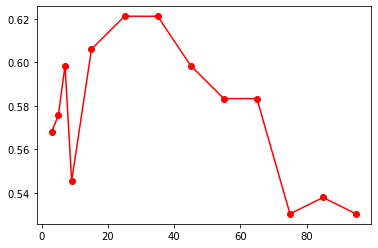

In [27]:
plt.plot(kernels,accuracy_list,color='r',marker='o')

In [30]:
max_accuracy = max(accuracy_list)
index= accuracy_list.index(max_accuracy)
best_k = kernels[index]
print('Max accuracy is {0} with {1} nearest neigbors'.format(max_accuracy,best_k))

Max accuracy is 0.6212121212121212 with 25 nearest neigbors


In [ ]:
# Iron man and spider man comics classificated with 62.1% accuracy.